## mpg

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
import os
import random
import numpy as np
import torch

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [3]:
df = sns.load_dataset('mpg')

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


In [9]:
df.dropna(inplace=True)

<Axes: >

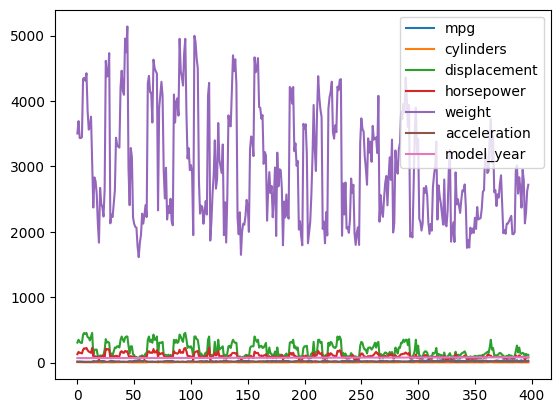

In [10]:
df.plot()

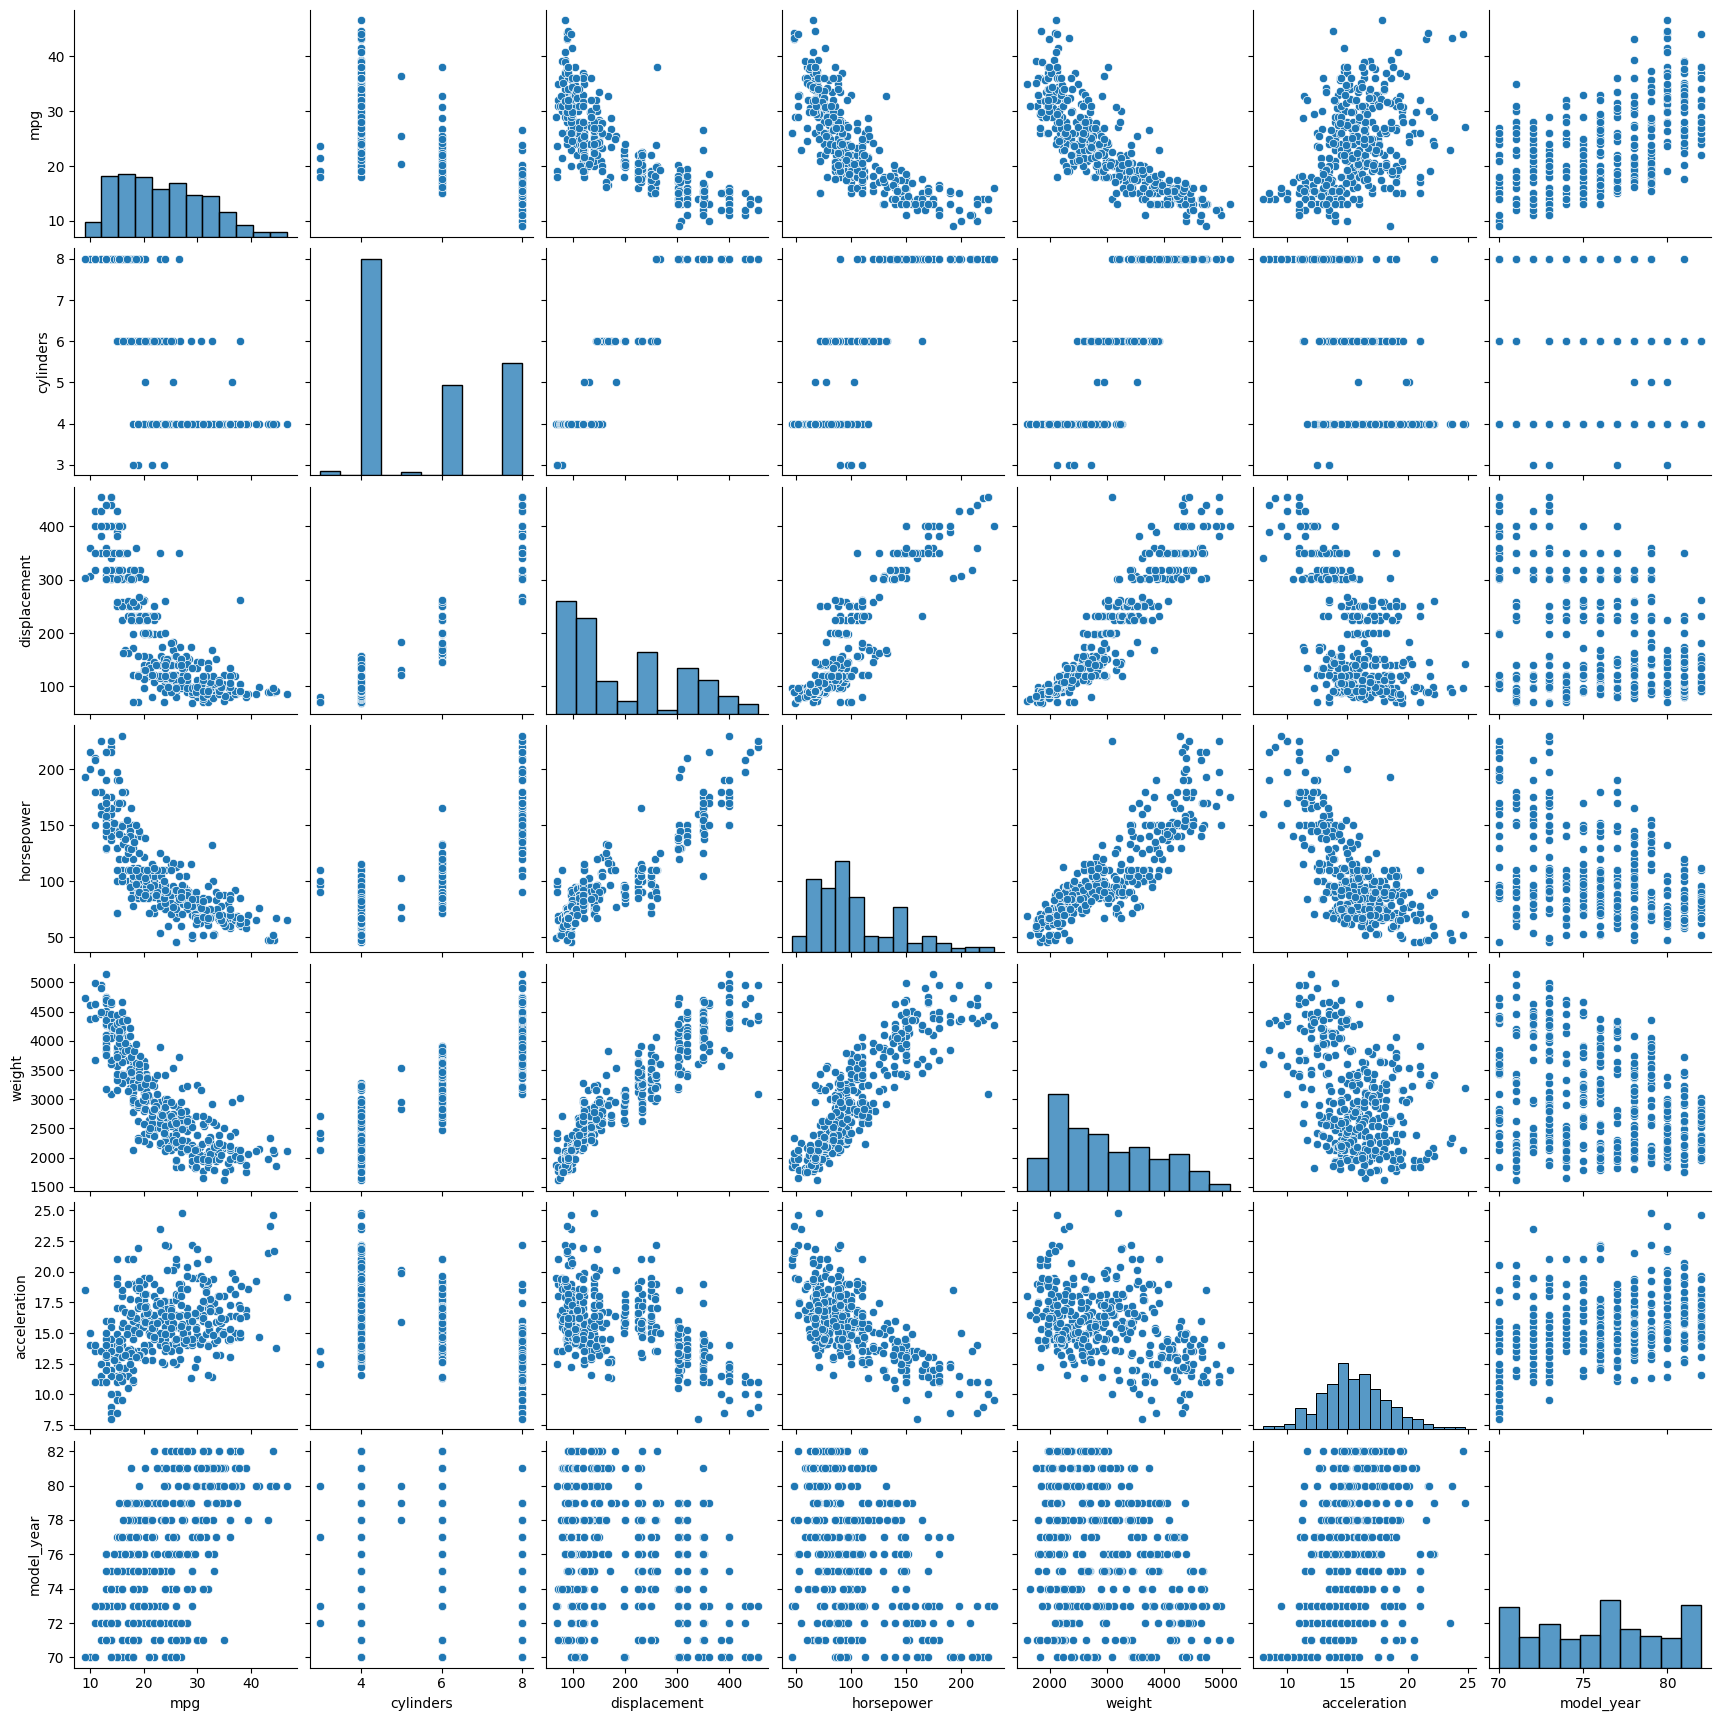

In [11]:
sns.pairplot(df)

In [12]:
print(df.origin.unique())

['usa' 'japan' 'europe']


In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

dfi = df.copy()

dfi['origin'] = label_encoder.fit_transform(dfi['origin'])
print(label_encoder.classes_)

['europe' 'japan' 'usa']


In [14]:
dfi.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,2,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,2,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,2,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,2,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,2,ford torino


In [15]:
y_data = dfi[['mpg']].values
dfi.drop(['mpg', 'name'], axis=1, inplace=True)
X_data = dfi.values

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils

In [17]:
class MpgModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(MpgModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, output_size)
        )
        
    def forward(self, x):
        output = self.model(x)
        return output


In [18]:
X_data = torch.Tensor(X_data)
y_data = torch.Tensor(y_data)
y_data = y_data.squeeze()

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2) # train과 test를 8:2로 분할

In [20]:
model = MpgModel(7, 1) 

In [21]:
n = 0
y = model(X_train[n]).detach() # 더 이상 연산을 추적하지 않는다
print(y, y_train[n])

tensor([129.4886]) tensor(18.6000)


In [22]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [23]:
print(model)

MpgModel(
  (model): Sequential(
    (0): Linear(in_features=7, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=1, bias=True)
  )
)


In [24]:
model = MpgModel(7, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

n_epochs = 10000 # 10000회 학습

avg_loss = 0 
for epoch in range(n_epochs):
    y = model(X_train)
    target = torch.unsqueeze(y_train, dim=1)
    loss = criterion(y, target).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        print('epoch {}th loss: {}'.format(epoch, loss.data))

epoch 0th loss: 162014.71875
epoch 1000th loss: 36.45602798461914
epoch 2000th loss: 20.185344696044922
epoch 3000th loss: 14.152260780334473
epoch 4000th loss: 13.069880485534668
epoch 5000th loss: 12.55746078491211
epoch 6000th loss: 12.067586898803711
epoch 7000th loss: 11.723594665527344
epoch 8000th loss: 11.617866516113281
epoch 9000th loss: 11.588069915771484


In [25]:
n = 30
y = model(X_train[n]).detach() # 더 이상 연산을 추적하지 않는다
print(y, y_train[n])

tensor([19.3725]) tensor(18.2000)


In [26]:
model = MpgModel(7, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

n_epochs = 40000 # 40000회 학습

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    model.train()
    y = model(X_train)
    target = torch.unsqueeze(y_train, dim=1)
    loss = criterion(y, target).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 5000 == 0:
        model.eval()
        y_pred = model(X_test)
        test_loss = criterion(y_pred, y_test).sum()
        print('epoch {}th training loss: {} test loss: {}'.format(epoch, loss.data, test_loss.data))
        list_training_loss.append(loss.data)
        list_test_loss.append(test_loss.data)

/home/ubuntu/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:616: UserWarning: Using a target size (torch.Size([79])) that is different to the input size (torch.Size([79, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch 0th training loss: 30766.169921875 test loss: 21487.2421875
epoch 5000th training loss: 8.616183280944824 test loss: 102.07374572753906
epoch 10000th training loss: 7.870425224304199 test loss: 104.04241943359375
epoch 15000th training loss: 7.854137420654297 test loss: 103.3750991821289
epoch 20000th training loss: 9.026883125305176 test loss: 106.39546966552734
epoch 25000th training loss: 7.810527324676514 test loss: 104.4963150024414
epoch 30000th training loss: 7.7288923263549805 test loss: 103.43135833740234
epoch 35000th training loss: 7.794650554656982 test loss: 104.45841979980469


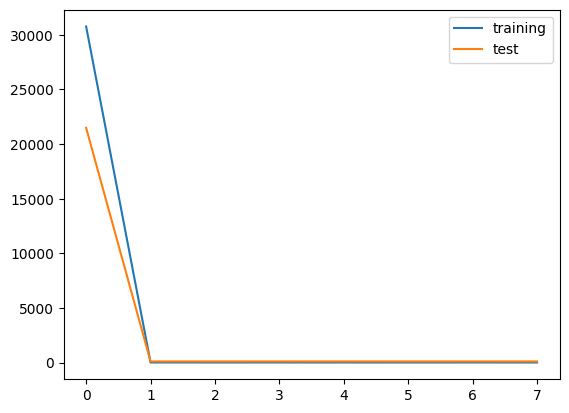

In [27]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import r2_score

with torch.no_grad():
    y_pred = model(X_test)
    score = r2_score(y_test, y_pred)
    print(score)

0.85377436876297


In [29]:
class MAPELoss(nn.Module):
    def __init__(self):
        super(MAPELoss, self).__init__()

    def forward(self, y_pred, y_true):
        epsilon = 1e-8  
        loss = torch.mean(torch.abs((y_true - y_pred) / (y_true + epsilon)))
        return loss * 100  
    
mape_loss = MAPELoss()
y_pred = model(X_test).squeeze()
loss_value = mape_loss(y_pred, y_test)
print(f"MAPE Loss: {loss_value.item():.4f}%")

MAPE Loss: 8.4274%
